# **Introducción**
El objetivo de la primera práctica es implementar el algoritmo de busqueda A*, cuyo objetivo es buscar el camino óptimo entre dos puntos.

# **Explicación algoritmo A***
El algoritmo A* se clasifica dentro de los algoritmos de búsqueda de grafos. El objetivo de este algoritmo es encontrar siempre el camino más óptimo, es decir, el camino de menor coste entre una posición inicial y una objetivo, para encontra dicho el algoritmo tiene que cumplir las restricciones del problema en cuestión.

Un aspecto muy importante de este algoritmo es la heurística, este concepto se puede definir como una suposición que hacemos basandos en lo que conocemos como en lo que desconocemos, el fin de la heurística es dotar de cierta inteligencia a nuestro algoritmo.

Dependiendo de la calidad de la heurística que usemos el coste computacional de nuestro algoritmo será uno u otro, en el mejor de los casos tendremos una complejidad lineal, mientras que si empleamos una mala heurística podrás darse el caso de tener una complejidad exponencial. Por lo que podemos decir, que la eficiencia del algoritmo A* está ligado a cuan buena sea la heuristica que usemos.
Por otro lado, un problema presente en este algoritmo es el coste espacial, este será exponencial respecto al tamaño del problema, ya que a mayor tamaño de problema tendremos que explorar muchos más nodos para encontrar la solución.

Ahora procedemos a explicar de manera general el algoritmo A*. Este algoritmo viene determinado por la siguiente función:

        f(n) = g(n) + h(n)

Donde g(n) representa el coste real desde el nodo inicial hasta el nodo actual. Por otro lado, está h(n) esto se trata de la función heurística, que en este caso será la estimación que hace desde el nodo actual hasta el nodo objetivo.

Como todo algoritmo de búsqueda en amplitud, este es un algoritmo completo: si existiese una solución siempre dará con ella.

Para garantizar la optimalidad del algoritmo, la función heurística que se emplee ha de ser admisible, es decir, que no sobreestime el coste real de alcanzar la meta desde el origen.

Relacionado con esto, una función h(n) es admisible cuando se cumple que:

        h(n) <= h*(n) Vn
En otras palabras, para cualquier nodo no final h(n) ha de ser menor que h*(n).

El algoritmo A* emplea dos estructuras de datos, la **lista frontera** cuyo objetivo es almacenar los distintos estados/nodos por donde es factible expandir, y la **lista interior**  la cual se emplea para guardar los estados/nodos que ya hemos visitado con anterioridad. Gracias a estas estructuras de datos podremos evaluar los nodos que sean más prometedores y no volver a visitar nodos los cuales ya hemos visitado.

# **Implementación**
A continuación mostramos el pseudocódigo del algoritmo a implementar, además de enseñar como se ha implementado para la práctica.

## **Pseudocódigo**
```
Alg A*
  listaInterior = vacio
  listaFrontera = inicio
  mientras listaFrontera no esté vacía
    n = obtener nodo de listaFrontera con menor f(n) = g(n) + h(n)
    listaFrontera.del(n)
    listaInterior.add(n)
    si n es meta
      devolver
      reconstruir camino desde la meta al inicio siguiendo los punteros
    fsi
    para cada hijo m de n que no esté en listaInterior
      g’(m) = n.g + c(n, m)  //g del nodo a explorar m
      si m no está en listaFrontera
        almacenar la f, g y h del nodo en (m.f, m.g, m.h)
        m.padre = n
        listaFrontera.add(m)
      sino si g’(m) es mejor que m.g  //Verificamos si el nuevo camino es mejor
        m.padre = n
        recalcular f y g del nodo m
      fsi
    fpara
  fmientras
  devolver no hay solución
falg
```

## **Clase Estado**

Para guardar los distintos estados del problema se ha decidido crear esta clase.

Esta clase tiene como atributos la casilla, un puntero a su Estado/Nodo predecesor, las funciones f, g y h. Algo a recalcar es que en una primera instancia, la función f, g y h valdrán 0.

En el construtor de esta clase pasamos como parámetro la casilla y además podríamos pasarle el padre si hubiese, en una primera instancia al tener un solo nodo estado no tendríamos padre, por lo que por defecto no tomará ningún valor. 

```Python
class Estado():
  def __init__(self, casilla: Casilla, padre = None):
        self.casilla = casilla
        self.f = self.g = self.h = 0
        self.parent = padre
```

Dentro de esta clase también he creado distitos getters y setters para los distintos atributos de la clase. Además de estas funciones una de las funciones que más importantes que debemos implementar para que funcione correctamente el programa es el método equals de Python, lo hacemos de la siguiente manera:

```Python
#Clase Estado
def __eq__(self, other):
      return self.casilla == other.casilla

#Clase Casilla
def __eq__ (self, other):
      return self.fila == other.fila and self.col == other.col
```
En el método equals de la clase Estado llamamos al método equals de la clase Casilla, por lo que, dos nodos serán iguales si sus filas y columnas coinciden.

## **Algoritmo**

Además de la clase Estado, también he creado un fichero llamado algoritmo, aquí tendremos toda la lógica de la función aEstrella que se llama en el fichero main.

En la función aEstrella tendremos que crear dos listas, la **lista frontera** y la **lista interior**, además de crear los estados correspondientes al origen y destino. El estadoOrigen o estadoInicial se añade a la **lista frontera**.
```Python
listaFrontera = []
listaInterior = []
estadoInicial = Estado(origen)
estadoFinal = Estado(destino)

#Añadimos el estado a la lista frontera
listaFrontera.append(estadoInicial)
```

Ahora entramos en el bucle while, este iterará mientras el tamaño de la lista frontera sea mayor a 0, o hasta que lleguemos a la meta. Justo al entrar al bucle while tendremos que buscar el **mejor estado** dentro de la **lista frontera**.

```Python
#Itera mientras haya nodos en la lista
while len(listaFrontera) > 0:
      n = mejorEstado(listaFrontera)
```

Buscamos el mejor estado respecto a la función f, es decir, el que tenga menor f:
```Python
def mejorEstado(listaFrontera):
    pos = 0

    for i in range(1, len(listaFrontera)):
        if listaFrontera[i].getF() < listaFrontera[pos].getF():
            pos = i
    return listaFrontera[pos]
```

Ahora si hemos llegado al estado meta ya hemos terminado, almacenamos el coste y reconstruimos el camino, para ello vamos mirando que el mejor nodo tenga padre y vamos actualizando, cuando ya no tenga hemos terminado.

```Python
if n == estadoFinal:
      res = n.getF()
      caminoReconstruido(n, camino)
      return res

#Función de reconstruir el camino
def caminoReconstruido(n, camino):
      while n.getPadre() is not None:
          camino[n.getCasilla().getFila()][n.getCasilla().getCol()] = 'X'
          n = n.getPadre()
```

Si no hemos encontrado la meta, entonces el mejor nodo lo añadimos a la **lista interior** porque ya lo hemos visitado y lo borramos de la **lista frontera** porque ya lo hemos evaluado.

```Python
else:
      listaInterior.append(n)
      listaFrontera.remove(n)
```

Tras esto tenemos que mirar a que posiciones validas podemos movernos, vamos a definir a una posición valida como una posición que en el mapa contenga el carácter '.', en el código se hace de otra manera ya que en la posiciones válidas se pone un 0, por ello comparamos cada posición adyacente con 0, además de esa primera condición también tenemos que comprobar que dicha posición es distinta de la del mejor nodo. En la siguiente imagen se puede apreciar que celdas son las válidas ('.'), el origen ('O') y las celdas de bloque del laberinto ('#').

<img src= "https://drive.google.com/uc?export=view&id=18JQO6qMs-5o_pZz15oaheA301AkK6DGS" height="400"  width="400">


Para sacar las posiciones correctas hemos diseñado la siguiente función:
```Python
def vecinosAdyacentes(mapa, n):
      adyacentes = []
      #Posicion del nodo actual
      x = n.getCasilla().getFila()
      y = n.getCasilla().getCol()

      #Recorremos los vecinos y miramos si son correctos, y se añade a la lista
      for i in range(x-1, x+2):
          for j in range(y-1, y+2):
              if mapa.getCelda(i,j) == 0 and not (i == x and j == y):
                  pos = Casilla(i, j)
                  adyacentes.append(Estado(pos))
      return adyacentes
```

Una vez que tenemos esta función implementada, ahora iteramos sobre dicha lista de posiciones adyacentes y realizamos una evaluación sobre estos nodos adyacentes.
```Python
for m in vecinosAdyacentes(mapi, n):
      if m not in listaInterior:
          #Calculamos el coste
          g_m = n.getG() + costeDesplazamiento(n, m)
          
```

Lo primero que hacemos en comprobar si el nodo vecino se encuentra en la **lista interior**, si ya se encuentra pasamos al siguiente, en caso de que no se encuentre tenemos que calcular la función g de dicho nodo, esto se calcula sumando la g actual del mejor nodo más el coste de desplazarse desde el mejor nodo hasta su vecino, para calcular el coste lo hacemos de una manera bastante intuitiva, en nuestro caso tan solo podemos desplazarnos en 8 posiciones, por ello podemos dos posibles movimientos, o en diagonal o en una dirección. En la siguiente imagen se puede apreciar todos los posibles movimientos desde una celda.

<img src= "https://drive.google.com/uc?export=view&id=1P9moL8SbFIl2T0-Zc_VlW6x1MCJSTUvs">

Para ello, lo primero que hacemos es sacar el valor absoluto de restar la fila del nodo vecino menos la fila del mejor nodo, y hacemos lo mismo con la columna, una vez tenemos ambos valores tenemos que sumarlos. Ahora tenemos dos casos, si dicha suma nos da como resultado 1 entonces se trata de un movimiento en una dirección por lo que su coste será 0, por otro lado si nos da como resultado es 2, entonces el coste será 1.5 al ser un movimiento en diagonal.


FOTO MOVIMIENTOS SEÑALANDO LAS DIFERENCIAS


La función que calcula el coste es la siguiente:
```Python
def costeDesplazamiento(n, m):
    res = abs(n.getCasilla().getFila() - m.getCasilla().getFila()) + \
        abs(n.getCasilla().getCol() - m.getCasilla().getCol())
    
    if res == 1:
        return 1
    else:
        return 1.5
```

Una vez hemos calculado la g del nodo vecino, miramos si el nodo está en la lista **frontera o no**, aquí nos surgen dos casos.

El caso más sencillo es si no está, esto quiere decir que nunca hemos intentado expandir por ese nodo, en este caso lo que tenemos que hacer es calcular para el nodo vecino las funciones f, g, h, asignarle como padre al mejor nodo, tras esto lo añadimos a la **lista frontera**.

```Python
if m not in listaFrontera:
        m.setG(g_m)
        m.setH(euclideaHeuristic(n, estadoFinal))
        m.setF(m.getG() + m.getH())
        m.setPadre(n)
        listaFrontera.append(m)
```

El otro caso es si el nodo vecino ya está en la **lista frontera**, si ya se encuentra lo que tenemos que comprobar si la g que hemos calculado para el nodo vecino es mejor que la g que tiene ese mismo nodo, si esto se cumple tenemos que recalcular las funciones y cambiar el padre del nodo vecino.
```Python
elif g_m < m.getG():
        m.setG(g_m)
        m.setH(0)
        m.setF(m.getG() + m.getH())
        m.setPadre(n)
```

Finalmente, si no hemos encontrado ningún camino entre el nodo origen y el destino, devolveremos como coste -1.



# **Traza de un caso acotado**



Este es el mapa sobre el cual realizaremos la traza, este coincide con el fichero mapa_traza.txt que se encuentra en la carpeta mundos.

<img src= "https://drive.google.com/uc?export=view&id=1GqhB5iv980mowhjl3-XZ40dp9WOMF-1f">

El fichero de texto asociado al mapa es el siguiente.

<img src= "https://drive.google.com/uc?export=view&id=1rHmpxsUsozNj3iQR6oyQuvMGzD0YPODT">

El objetivo es ir desde el origen hasta la celda que se encuentra 3 posiciones a la derecha. Como función heurística de este problema usaremos la **distancia de Manhattan**.
Antes que nada, tendremos nuestras dos listas para resolver este problema, la lista interior y la frontera, en cada iteración indicaremos que nodos/estados tiene.

Antes de entrar en el bucle while el nodo origen se añade a la lista frontera.

## **Iteración 1**
En la primera iteración al tener un solo elemento en la lista frontera, elegiremos ese como el mejor nodo.

La lista frontera parte con estos elementos:

(1, 1)[f: 0, g: 0, h: 0]

La lista interior por su parte no tendría ningún elemento.

Ahora miramos si hemos llegado a la meta, vemos que no, por lo que tendremos que eliminar el mejor nodo de la frontera y añadirlo a la lista interior, ahora procedemos a  mirar los vecinos válidos.

Si nos fijamos en la imagen, los vecinos válidos serían el que está a su derecha y el que está en diagonal abajo, estos se añaden a la lista frontera.

<img src= "https://drive.google.com/uc?export=view&id=18bLtv4nBKhumHmrIAEsAUTOjMNuP1ke6">


>Vecino derecha

El vecino que está a la derecha tiene como g_m = 0 + 1.

Para calcular la h tenemos que saber donde está el destino, este está en la fila 1, y columna 4.

Calculamos la h empleando la formula de la distancia de Manhattan.

 h = abs(1 - 1) + abs(4-2) = 2

Su f será 1 + 2 = 3

> Vecino diagonal abajo 

El vecino que está en diagonal abajo tiene como g_m = 0 + 1.5.

Calculamos su h, está será:

h = abs(1-2) + abs(4-2) = 3

Su f será 1.5 + 3 = 4.5.


Ahora pasamos a la siguiente iteración.

## **Iteración 2**
En la segunda iteración ya contamos con varios elementos en la lista fronteta, tendremos que decidir por donde expandir.

La **lista frontera** contiene estos elementos:

(1, 2)[f: 3, g: 1, h: 2]

(2, 2)[f: 4.5, g: 1.5, h: 3]

La **lista interior** contiene estos elementos:

(1, 1)[f: 0, g: 0, h: 0]

Vemos que el mejor nodo de la fronterá sería el nodo (1,2), ya que su f es 3, por lo que elegimos ese como mejor nodo, este tampoco es meta. Repetimos los pasos de la iteración anterior.

Nos fijamos en la imagen para ver los vecinos válidos:

<img src= "https://drive.google.com/uc?export=view&id=1PtVZgbQI3Et5MMv0JtbvHJB1DYBrSCW2">


Vemos que sólo puede añadir como vecino válido el que está abajo de él. Como este nodo vecino ya se encuentra en la lista frontera, tenemos que ver si tenemos mejor coste yendo por el camino de derecha, y luego abajo.

> Vecino abajo

g_m = 1 + 1 = 2

m.g = 1

Vemos que en este caso no cambiaríamos nada de la lista frontera, debido a que es más eficaz ir en diagonal que a la derecha y luego abajo. 


## **Iteración 3**
En esta iteración, la **lista frontera** contiene estos elementos:

(2, 2)[f: 4.5, g: 1.5, h: 3]

Mientras que la **lista interior** contiene estos:

(1, 1)[f: 0, g: 0, h: 0]

(1, 2)[f: 3, g: 1, h: 2]


Vemos que la **lista frontera** sólo tiene un elemento por lo que ese será nuestro mejor nodo.
Comprobamos si es meta, vemos que no lo es, por lo que expandimos a sus hijos. Nos fijamos en la imagen para ver que posiciones serían las válidas:

<img src= "https://drive.google.com/uc?export=view&id=1PMuqqBP3qf-kArJJEy1A8myiybjO5MxH">


Vemos que tenemos dos posiciones válidas, en diagonal abajo izquierda y en diagonal abajo derecha, ambos vecinos se añaden a la lista frontera porque no estaban con anterioridad.

> Vecino abajo izquierda
g_m = 1.5 + 1.5 = 3

h = abs(1 - 3) + (4-1) = 5

f = 3 + 5 = 8

> Vecino abajo derecha
g_m = 1.5 + 1.5 = 3

h = abs(1-3) + abs(4-3) = 3

f = 3 + 3 = 6

Ambos nodos se añaden a la **lista interior**.

##**Iteración 4**

En esta iteración, la **lista frontera** contiene estos elementos:

(3, 1)[f: 8.0, g: 3.0, h: 5]

(3, 3)[f: 6.0, g: 3.0, h: 3]


Mientras que la **lista interior** contiene estos:

(1, 1)[f: 0, g: 0, h: 0]

(1, 2)[f: 3, g: 1, h: 2]

(2, 2)[f: 4.5, g: 1.5, h: 3]

Vemos que el nodo que menos f tiene es el nodo (3, 3), este es el nodo de desplazarnos en diagonal abajo derecha. Al igual que antes miramos la imagen para ver que vecinos serían válidos.

<img src= "https://drive.google.com/uc?export=view&id=1HIj55U1n_R2LKzow9MDBs0BXvmYLV4f0">


Vemos que tendríamos 3 posibles vecinos, desde donde venimos, a la derecha y en diagonal derecha arriba. De antemano vamos a descartar desde donde venimos ya que dicho nodo ya está en la **lista interior**. Ahora nos quedan dos posibles vecinos.

> Vecino derecha

g_m = 3 + 1 = 4

h = abs(1-3) + abs(4-4) = 2

f = 4 +  2 = 6

> Vecino diagonal arriba

g_m = 3 + 1.5 = 4.5

h = abs(2-1) + abs(4-4) = 1

f = 4.5 + 1 = 5.5

Ambos nodos se añaden a la **lista interior**.





## **Iteración 5**
En esta iteración, la **lista frontera** contiene estos elementos:

(3, 1)[f: 8.0, g: 3.0, h: 5]

(2, 4)[f: 5.5, g: 4.5, h: 1]

(3, 4)[f: 6.0, g: 4.0, h: 2]


Mientras que la **lista interior** contiene estos:

(1, 1)[f: 0, g: 0, h: 0]

(1, 2)[f: 3, g: 1, h: 2]

(2, 2)[f: 4.5, g: 1.5, h: 3]

(3, 3)[f: 6.0, g: 3.0, h: 3]

Cogemos como mejor nodo el (2,4), que es que está en diagonal arriba, como no es meta tenemos que explorar sobre sus vecinos. Si nos fijamos en la imagen vemos que podemos ir hacia arriba o hacia abajo:

<img src= "https://drive.google.com/uc?export=view&id=1aHxbXMdRD95gxxKwymnT5lQfUaROpJ0d">


Sus dos vecinos validos son:

> Vecino arriba
g_m = 4.5 + 1 = 5.5

h = abs(1-1) + abs(4-4) = 0

f = 5.5 + 0 = 5.5

> Vecino abajo

En este caso hay que ver si el coste de bajar hacia abajo es menor de la g del propio nodo.
g_m = 4.5 + 1 = 5.5

m.g = 4

Vemos que g_m no es menor que m.g por lo que no actualizamos nada.

Añadimos el nodo a la **lista frontera**.


##**Iteración 6**

En esta iteración, la **lista frontera** contiene estos elementos:

(3, 1)[f: 8.0, g: 3.0, h: 5]

(3, 4)[f: 6.0, g: 4.0, h: 2]

(1, 4)[f: 5.5, g: 5.5, h: 0]

Mientras que la **lista interior** contiene estos:

(1, 1)[f: 0, g: 0, h: 0]

(1, 2)[f: 3, g: 1, h: 2]

(2, 2)[f: 4.5, g: 1.5, h: 3]

(3, 3)[f: 6.0, g: 3.0, h: 3]

(2, 4)[f: 5.5, g: 4.5, h: 1]

Vemos que el mejor nodo es el (1, 4) con coste 5.5, vemos que este coincide con el nodo meta, por lo que ya hemos terminado.

El camino resultante se quedaría así:

<img src= "https://drive.google.com/uc?export=view&id=1LeF5HzWUl0Ty5GeNpwiQNeOhPIh9GGa1">


# **Heurísticas**


Como se ha hablado con anterioridad, una función heurística se define como una estimación que hacemos en base a un conocimiento que conocemos y otros que desconocemos. El principal objetivo de la función heurística es acelar la búsqueda del algoritmo, ya que si se elige una buena función heurística hará que expandamos menos nodos.


## **Heurística Básica**
Este caso es el más sencillo a la hora de implementar, ya que como tal no es ninguna heurística por lo que no dotamos con el juicio de valor que proporciona una heurística. Un problema que supone el uso de esta heurística es que expandiremos muchos más nodos ya que no descartaremos nodos al no tener una inteligencia en nuestro algoritmo, se podría dar el caso que esta heurística de como resultado una complejidad prohibitiva a medida que aunmente el tamaño del problema.
> h = 0

## **Distancia de Manhattan**
La distancia de Manhttan es una heurística que normalmente se emplea en entornos que permitan el movimiento en las cuatros direcciones, u ocho si consideramos el movimiento diagonal. Un problema de esta heurística es que no es admisible debido a que en ciertos mapas no da la solución correcta.

> h = | x2 - x1 | + | y2 - y1|


## **Distancia Euclidea**
La distancia Euclidea, o también llamada distancia ordinaria, ya que cuando se habla de distancia entre dos puntos se están refiriendo a la distancia Euclidea, por lo que al ser un concepto que tenemos interiorizado, esta se define como la distancia en línea recta entre dos puntos.

La distancia Euclidea viene determinada por la siguiente fórmula:
> h =  sqrt((x2 - x1)^2 + (y2 - y1)^2)

## **Distancia de Chebyshev**
La distancia de Chebyshev se define como la mayor distancia en unos de los dos ejes. Debido a su naturaleza, a esta distancia también se la conoce como la distancia del tablero del ajedrez, ya que esta distancia es igual al número mínimo de movimientos que necesita un rey para ir de una casilla a otra. Viene definida por la siguiente fórmula

> h = max( | x2 - x1 |, | y2 - y1 |)

Una posible problematica de esta distancia es que su uso es muy acotado, esto hará que su uso no sea tan extendido como otras distancias, como puede ser la distancia Euclidea, mencioanda anteriomente.

Como se ha mencionado, esta distancia se puede usar para calcular el número de movimientos mínimo en un tablero de ajedrez, por lo que puede ser útil usarlo en problemas que permitan el movimiento en 8 direcciones.









## **Heurística Admisible**
Como hemos mencionado con anterioridad una heurística es **admisible** si nunca sobreestima el coste de llegar desde el estado inicial al final. Si la función que se emplea no es **admisible**, puede que el algoritmo si que llegue a encontrar el camino pero puede que no sea el camino óptimo.

Por lo que, la función heurística debería de cumplir:

> h(n) <= h*(n)

Donde h*(n) es el coste mínimo real de la celda n hasta la meta. Si la función que empleemos es distinta de la función real la heurística ya tiene un mayor coste al mínimo real y podríamos considerar que no se trata de una función heurística admisible.


# **Análisis**

Antes de realizar las distintas comparativas entre las heurísticas que hemos explicado en el apartado anterior, se ha decidido crear nuevos mapas a parte de los que se nos proporcionan, para comparar las heurísticas de una manera más eficiente, se han diseñado los siguientes mapas.

En primer lugar tenemos el siguiente mapa, así como algo diferenciador, aquí las celdas navegables son de "doble anchura":

<img src= "https://drive.google.com/uc?export=view&id=1dPGYEo4uEBwZi6HpRjIKp-Hn0ekdnlyh"  width="500" height="500">
---

El segundo mapa que se ha diseñado es el siguiente, este sigue el patrón de los que se proporcionan en la práctica:

<img src= "https://drive.google.com/uc?export=view&id=1NLRyBNYRODs2BVp5V9Oo-Pa-81V1B-1N"  width="500" height="500">



## **Nodos Expandidos**
En primer lugar vamos a relizar una comparación en cuanto a nodos expandidos a medida que aumenta la longitud o coste del camino.

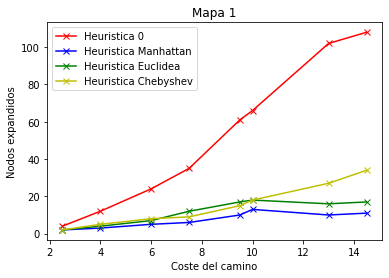

In [1]:
import matplotlib.pyplot as plt
import random

#Mapa 1
#Heuristica 0
x = [2.5, 4, 6, 7.5, 9.5, 10, 13, 14.5]
y = [4, 12, 24, 35, 61, 66, 102, 108]

#Manhattan
xM = [2.5, 4, 6, 7.5, 9.5, 10, 13, 14.5]
yM = [2, 3, 5, 6, 10, 13, 10, 11]

#Euclidea
xE = [2.5, 4, 6, 7.5, 9.5, 10, 13, 14.5]
yE = [2, 4, 7, 12, 17, 18, 16, 17]

#Chebychev
xC = [2.5, 4, 6, 7.5, 9.5, 10, 13, 14.5]
yC = [2, 5, 8, 9, 15, 18, 27, 34]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa 1')

ax.plot(x, y, '-xr', label = "Heuristica 0")
ax.plot(xM, yM, '-xb', label = "Heuristica Manhattan")
ax.plot(xE, yE, '-xg', label = "Heuristica Euclidea")
ax.plot(xC, yC, '-xy', label = "Heuristica Chebyshev")

#Pone título a los ejes y mostramos la leyenda
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

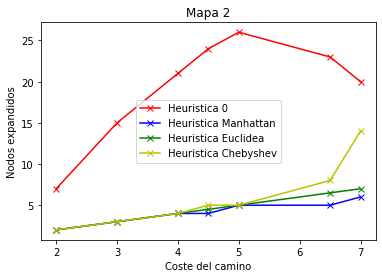

In [2]:
import matplotlib.pyplot as plt
import random

#Mapa 2
#Heuristica 0
x = [2, 3, 4, 4.5, 5, 6.5, 7]
y = [7, 15, 21, 24, 26, 23, 20]

#Manhattan
xM = [2, 3, 4, 4.5, 5, 6.5, 7]
yM = [2, 3, 4, 4, 5, 5, 6]

#Euclidea
xE = [2, 3, 4, 4.5, 5, 6.5, 7]
yE = [2, 3, 4, 4.5, 5, 6.5, 7]

#Chebychev
xC = [2, 3, 4, 4.5, 5, 6.5, 7]
yC = [2, 3, 4, 5, 5, 8, 14]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa 2')

ax.plot(x, y, '-xr', label = "Heuristica 0")
ax.plot(xM, yM, '-xb', label = "Heuristica Manhattan")
ax.plot(xE, yE, '-xg', label = "Heuristica Euclidea")
ax.plot(xC, yC, '-xy', label = "Heuristica Chebyshev")

#Pone título a los ejes
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

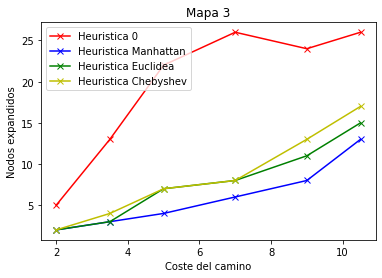

In [3]:
import matplotlib.pyplot as plt
import random

#Mapa 3
#Heuristica 0
x = [2, 3.5, 5, 7, 9, 10.5]
y = [5, 13, 22, 26, 24, 26]

#Manhattan
xM = [2, 3.5, 5, 7, 9, 10.5]
yM = [2, 3, 4, 6, 8, 13]

#Euclidea
xE = [2, 3.5, 5, 7, 9, 10.5]
yE = [2, 3, 7, 8, 11, 15]

#Chebychev
xC = [2, 3.5, 5, 7, 9, 10.5]
yC = [2, 4, 7, 8, 13, 17]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa 3')

ax.plot(x, y, '-xr', label = "Heuristica 0")
ax.plot(xM, yM, '-xb', label = "Heuristica Manhattan")
ax.plot(xE, yE, '-xg', label = "Heuristica Euclidea")
ax.plot(xC, yC, '-xy', label = "Heuristica Chebyshev")

#Pone título a los ejes
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

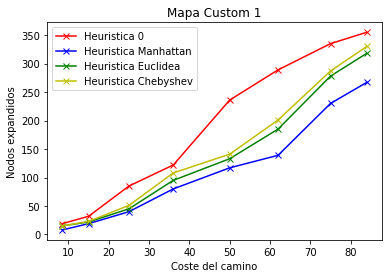

In [4]:
import matplotlib.pyplot as plt
import random

#Mapa Custom 1
#Heuristica 0
x = [8.5, 15, 25, 36, 50, 62, 75, 84]
y = [19, 32, 85, 122, 236, 289, 335, 355]

#Manhattan
xM = [8.5, 15, 25, 36, 50, 62, 75, 84]
yM = [8, 19, 40, 80, 117, 139, 230, 267]

#Euclidea
xE = [8.5, 15, 25, 36, 50, 62, 75, 84]
yE = [15, 22, 45, 95, 133, 185, 278, 318]

#Chebychev
xC = [8.5, 15, 25, 36, 50, 62, 75, 84]
yC = [15, 23, 51, 108, 141, 201, 287, 330]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa Custom 1')

ax.plot(x, y, '-xr', label = "Heuristica 0")
ax.plot(xM, yM, '-xb', label = "Heuristica Manhattan")
ax.plot(xE, yE, '-xg', label = "Heuristica Euclidea")
ax.plot(xC, yC, '-xy', label = "Heuristica Chebyshev")

#Pone título a los ejes
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

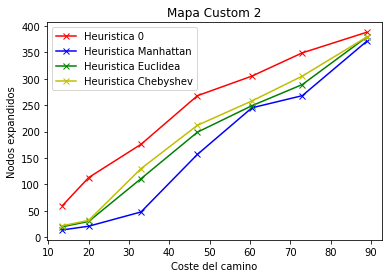

In [5]:
import matplotlib.pyplot as plt
import random

#Mapa Custom 2
#Heuristica 0
x = [13.5, 20, 33, 47, 60.5, 73, 89]
y = [60, 113, 176, 268, 305, 349, 388]

#Manhattan
xM = [13.5, 20, 33, 47, 60.5, 73, 89]
yM = [14, 21, 48, 157, 245, 268, 371]

#Euclidea
xE = [13.5, 20, 33, 47, 60.5, 73, 89]
yE = [20, 30, 111, 199, 249, 289, 379]

#Chebychev
xC = [13.5, 20, 33, 47, 60.5, 73, 89]
yC = [22, 32, 130, 212, 258, 305, 379]

#Grafica
figura, ax = plt.subplots()
plt.title('Mapa Custom 2')

ax.plot(x, y, '-xr', label = "Heuristica 0")
ax.plot(xM, yM, '-xb', label = "Heuristica Manhattan")
ax.plot(xE, yE, '-xg', label = "Heuristica Euclidea")
ax.plot(xC, yC, '-xy', label = "Heuristica Chebyshev")

#Pone título a los ejes
plt.xlabel('Coste del camino')
plt.ylabel('Nodos expandidos')
ax.legend()

#Mostrar
plt.show()

##**Recorrido**
Ahora vamos a comparar el camino de las distintas heurísticas, ya que dependiendo de la heurística hará uno u otro camino.
En primer lugar vamos a tener en cuenta como camino óptimo a la heurística h = 0.


### **Mapa custom 1**
**Sin heurística**

<img src= "https://drive.google.com/uc?export=view&id=13_DIPfRoGGzWSTsWYQ4_JOX2Lgmyl862"  width="500" height="500">

**Distancia de Manhattan**

<img src= "https://drive.google.com/uc?export=view&id=13_DIPfRoGGzWSTsWYQ4_JOX2Lgmyl862"  width="500" height="500">

**Distancia de Euclides**

<img src= "https://drive.google.com/uc?export=view&id=13_DIPfRoGGzWSTsWYQ4_JOX2Lgmyl862"  width="500" height="500">

**Distancia de Chebyshev**

<img src= "https://drive.google.com/uc?export=view&id=13_DIPfRoGGzWSTsWYQ4_JOX2Lgmyl862"  width="500" height="500">


En este caso todos los recorridos coinciden.

### **Mapa custom 2**
**Sin heurística**

<img src= "https://drive.google.com/uc?export=view&id=1QU5Jwvo8J-mH4R9J0iyi6XeCgltVuWY7"  width="500" height="500">

**Distancia de Manhattan**

<img src= "https://drive.google.com/uc?export=view&id=1nHg-rUlteLG8htPg4xnYMZcJxGcjvO2q"  width="500" height="500">

**Distancia de Euclides**

<img src= "https://drive.google.com/uc?export=view&id=1nHg-rUlteLG8htPg4xnYMZcJxGcjvO2q"  width="500" height="500">

**Distancia de Chebyshev**

<img src= "https://drive.google.com/uc?export=view&id=1nHg-rUlteLG8htPg4xnYMZcJxGcjvO2q"  width="500" height="500">

Vemos que en este mapa si que cambia el recorrido, esto se debe a como exploramos los nodos vecinos y a como se aplican las distintas heurísticas.

# **Conclusiones**

Para concluir, podemos decir que el algoritmo A* es muy útil para evitar explorar una cantidad excesiva de nodos, obteniendo un algoritmo fácil de implementar a la vez que potente. Si usasemos un algoritmo que emplee otro esquema como Backtracking podría ser menos eficaz.

Bajo mi punto de vista lo que más ha costado ha sido adaptarse al lenguaje de programación Python ya que nunca lo habíamos usado, aunque su curva de aprendizaje es bastante baja, y junto a la herramienta Google Collab es aún más potente.

Algo también que me costó entender al principio fue el tema de los movimientos, porque al menos en mi caso no me habái enfrentado antes a un problema similar.

# **Referencias**

[A* (A Star) Search Algorithm - Computerphile](https://youtu.be/ySN5Wnu88nE)

[A* Search](https://youtu.be/6TsL96NAZCo)


[Introduction to the A* Algorithm
  from Red Blob Games](https://www.redblobgames.com/pathfinding/a-star/introduction.html)

[Búsqueda de caminos en los Videojuegos: Algoritmo A* (Estrella)](https://www.youtube.com/watch?v=1gszEk8rUS4)